In [1]:
# basic configuration, put these lines at the top of each notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!ln -s ../data

ln: ./data: File exists


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = None
pd.set_option("display.precision", 2)
pd.options.display.max_rows = 100

In [5]:
data = pd.read_csv("data/insurance.csv")
data.shape

(1338, 7)

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

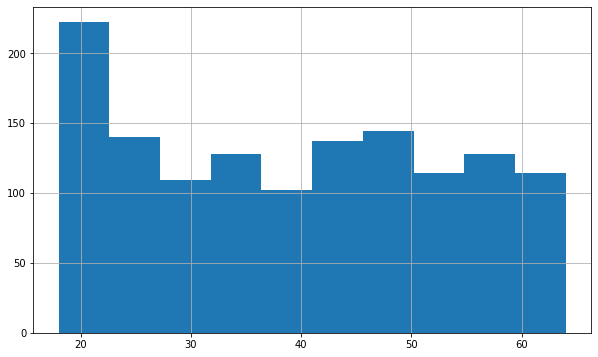

In [8]:
data.age.hist()

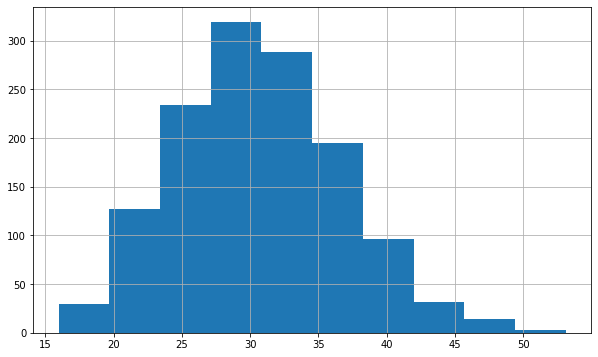

In [9]:
data.bmi.hist()

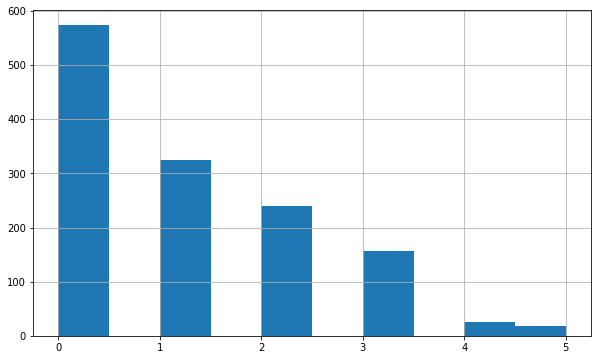

In [10]:
data.children.hist()

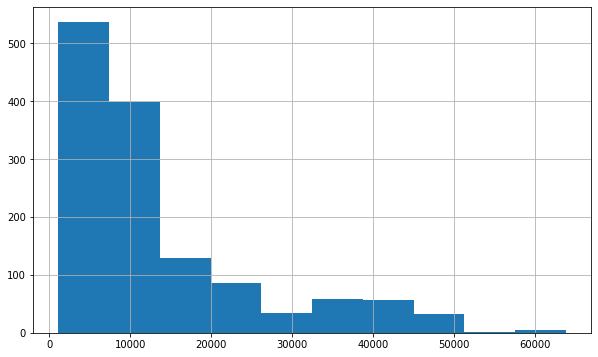

In [11]:
data.charges.hist()

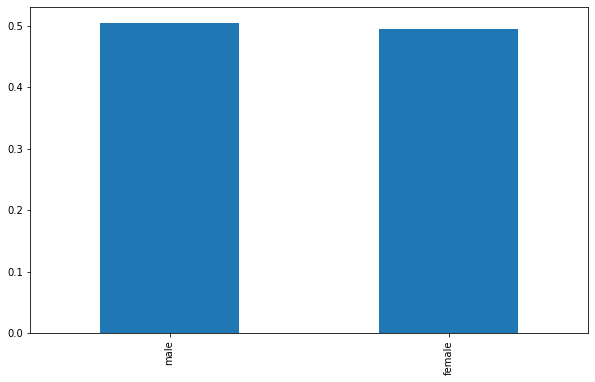

In [12]:
data.sex.value_counts(normalize=True).plot(kind='bar')

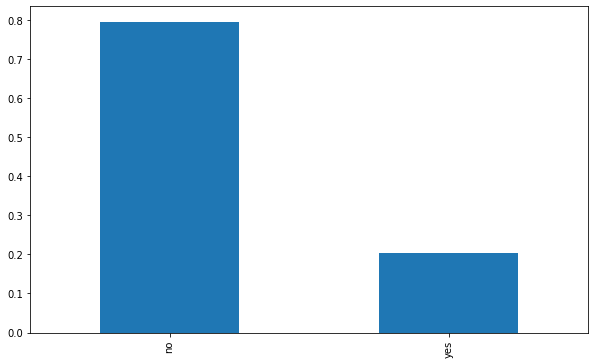

In [13]:
data.smoker.value_counts(normalize=True).plot(kind='bar')

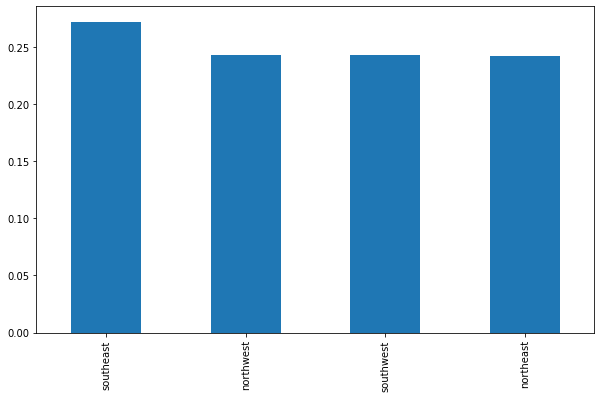

In [14]:
data.region.value_counts(normalize=True).plot(kind='bar')

In [15]:
cat_cols = ['sex', 'smoker', 'region']
data = pd.get_dummies(data, prefix=cat_cols, columns=cat_cols)
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.00,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.70,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.88,0,3866.86,0,1,1,0,0,1,0,0


In [16]:
data = data.drop(columns=['sex_female', 'smoker_no'])
data = data.rename(columns={'smoker_yes': 'smoker', 'sex_male': 'sex'})
data.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.92,0,1,0,0,0,1
1,18,33.77,1,1725.55,1,0,0,0,1,0
2,28,33.00,3,4449.46,1,0,0,0,1,0
3,33,22.70,0,21984.47,1,0,0,1,0,0
4,32,28.88,0,3866.86,1,0,0,1,0,0


In [17]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
age,1.00,0.11,0.04,0.30,-0.02,-0.03,0.00,-0.00,-0.01,0.01
bmi,0.11,1.00,0.01,0.20,0.05,0.00,-0.14,-0.14,0.27,-0.01
children,0.04,0.01,1.00,0.07,0.02,0.01,-0.02,0.02,-0.02,0.02
charges,0.30,0.20,0.07,1.00,0.06,0.79,0.01,-0.04,0.07,-0.04
sex,-0.02,0.05,0.02,0.06,1.00,0.08,-0.00,-0.01,0.02,-0.00
smoker,-0.03,0.00,0.01,0.79,0.08,1.00,0.00,-0.04,0.07,-0.04
region_northeast,0.00,-0.14,-0.02,0.01,-0.00,0.00,1.00,-0.32,-0.35,-0.32
region_northwest,-0.00,-0.14,0.02,-0.04,-0.01,-0.04,-0.32,1.00,-0.35,-0.32
region_southeast,-0.01,0.27,-0.02,0.07,0.02,0.07,-0.35,-0.35,1.00,-0.35
region_southwest,0.01,-0.01,0.02,-0.04,-0.00,-0.04,-0.32,-0.32,-0.35,1.00


In [18]:
data.to_csv("data/insurance_preprocessed.csv", index=False)